## Transcriptions `Analyzer`

In [1]:
# %pip install matplotlib
# %pip install sqlite3
#%pip install plotly
#%pip install pandas
#%pip install nbformat


In [2]:
import sqlite3
import matplotlib.pyplot as plt

In [3]:
# Connect to the database
conn = sqlite3.connect('transcriptions.db')
cursor = conn.cursor()

In [4]:
# Query the database 
cursor.execute('SELECT issue_category FROM transcriptions')
results = cursor.fetchall()

In [5]:
# Process the data
category_counts = {}
for result in results:
    category = result[0]
    category_counts[category] = category_counts.get(category, 0) + 1

In [6]:
# Draw the pie chart
labels = category_counts.keys()
sizes = category_counts.values()

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/wambugumuchemi/Projects

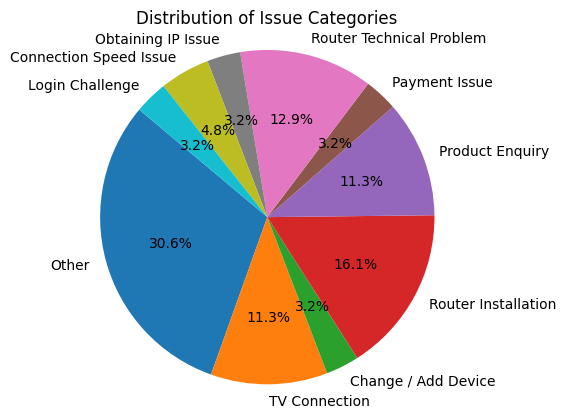

In [7]:
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Issue Categories')
plt.show()

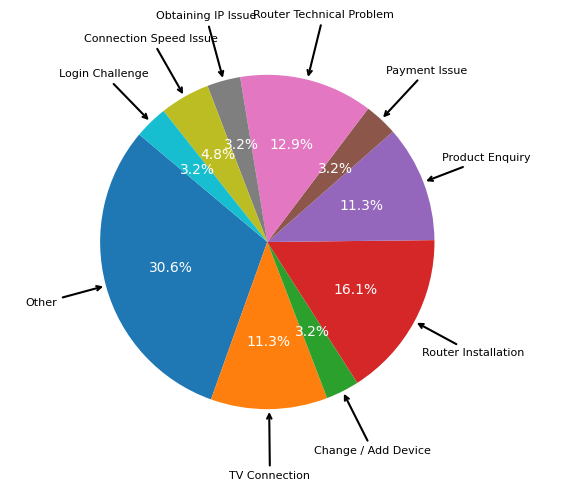

In [8]:
import numpy as np
labels = list(category_counts.keys())
sizes = list(category_counts.values())

# Create a pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, textprops=dict(color="w"))

# Add arrows to labels
for label, wedge in zip(labels, wedges):
    theta = (wedge.theta1 + wedge.theta2) / 2.0
    rad = 5  # You can adjust this distance
    x = rad * 0.8 * wedge.center[0] + rad * 0.2 * np.cos(np.radians(theta))
    y = rad * 0.8 * wedge.center[1] + rad * 0.2 * np.sin(np.radians(theta))
    plt.annotate(label, (x, y), xytext=(x * 1.4, y * 1.4),
                 arrowprops=dict(arrowstyle='->', lw=1.5),
                 fontsize=8, ha='center', va='center')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#plt.title('Distribution of Issue Categories with Arrows to Labels')
plt.show()

### We can also use <span style="color:turquoise;">PLOTLY</span> to visualize the data


In [9]:
# Create a pie chart using Plotly
import plotly.express as px
import pandas

labels = list(category_counts.keys())
values = list(category_counts.values())
fig = px.pie(labels=labels, values=values, title='Distribution of Issue Categories')
#fig.update_layout(renderer="notebook")
fig.write_html('plotly_chart.html')
fig.show()


In [10]:
# Close the database connection
conn.close()

### Visualize issues reported per day.

In [11]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('transcriptions.db')
query = "SELECT DATE(date), issue_category, COUNT(*) AS count FROM transcriptions WHERE issue_category IS NOT NULL GROUP BY DATE(date), issue_category"
df = pd.read_sql_query(query, conn)



In [12]:

df_pivot = df.pivot(index='DATE(date)', columns='issue_category', values='count').fillna(0)
print (df_pivot)


issue_category  Change / Add Device  Connection Speed Issue  Login Challenge  \
DATE(date)                                                                     
2023-10-23                      0.0                     0.0              0.0   
2023-10-24                      1.0                     0.0              0.0   
2023-10-25                      0.0                     0.0              0.0   
2023-10-26                      1.0                     0.0              0.0   
2023-10-27                      0.0                     0.0              0.0   
2023-10-28                      0.0                     2.0              1.0   
2023-10-31                      0.0                     1.0              0.0   
2023-11-01                      0.0                     0.0              1.0   

issue_category  Obtaining IP Issue  Other  Payment Issue  Product Enquiry  \
DATE(date)                                                                  
2023-10-23                     0.0    5.0    

#### Matplotlib

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() 

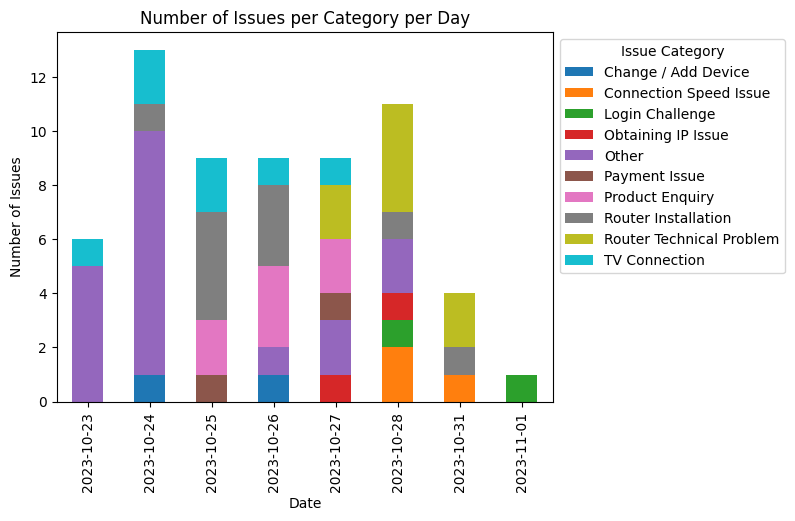

In [13]:
import matplotlib.pyplot as plt

df_pivot.plot(kind='bar', stacked=True)
plt.xlabel('Date')
plt.ylabel('Number of Issues')
plt.title('Number of Issues per Category per Day')
plt.legend(title='Issue Category', bbox_to_anchor=(1, 1))
plt.show()


#### Plotly

In [14]:
import plotly.express as px

fig = px.bar(df, x='DATE(date)', y='count', color='issue_category', title='Number of Issues per Category per Day')
fig.show()

#### Seaborn

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() 

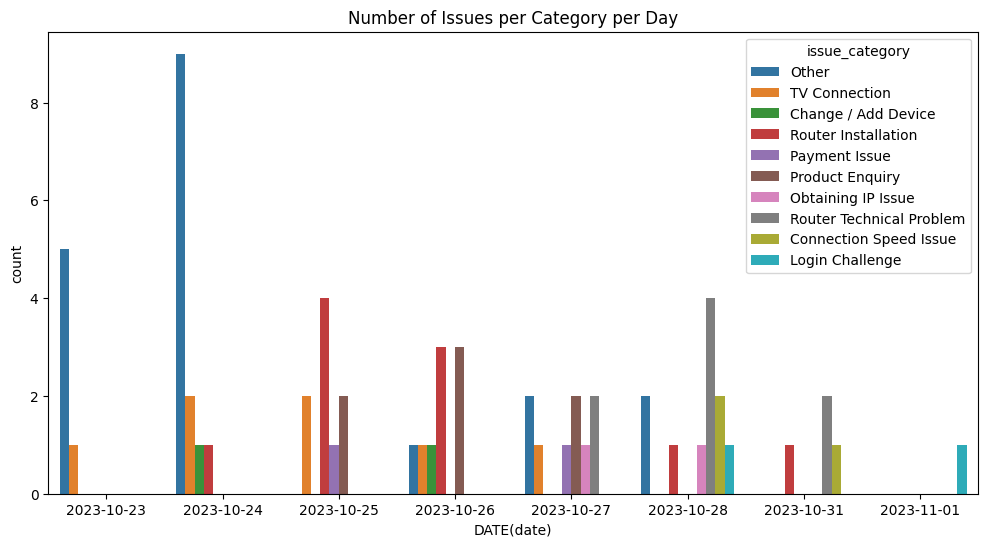

In [15]:
#%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_pivot is already created
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='DATE(date)', y='count', hue='issue_category')
plt.title('Number of Issues per Category per Day')
plt.show()


In [16]:
# %pip install altair
# %pip install bokeh
# %pip install pygal


#### Bokeh

In [17]:
# from datetime import datetime
# from bokeh.plotting import figure, show
# from bokeh.models import ColumnDataSource

# # Convert 'date' to datetime if it's not already
# df['date'] = pd.to_datetime(df['DATE(date)'])

# source = ColumnDataSource(df)

# plot = figure(x_axis_label='Date', y_axis_label='Count', title='Number of Issues per Category per Day')

# plot.vbar(x='date', top='count', width=0.9, color='issue_category', source=source)

# # Rotate x-axis labels for better visibility
# plot.xaxis.major_label_orientation = "vertical"

# show(plot)



In [18]:
import altair as alt
import pandas as pd

# Your data retrieval code
conn = sqlite3.connect('transcriptions.db')
query = "SELECT DATE(date) as date, issue_category, COUNT(*) AS count FROM transcriptions WHERE issue_category IS NOT NULL GROUP BY DATE(date), issue_category"
df = pd.read_sql_query(query, conn)

# Altair chart
chart = alt.Chart(df).mark_bar().encode(
    x='DATE(date):O',
    y='count:Q',
    color='issue_category:N',
).properties(
    title='Number of Issues per Category per Day'
).interactive()

# Save Altair chart as HTML
alt.renderers.set_embed_options(html=True)
chart.save('altair_chart.html')


#### Altair

In [19]:
import altair as alt

alt.Chart(df).mark_bar().encode(
    x='DATE(date):O',
    y='count:Q',
    color='issue_category:N',
).properties(
    title='Number of Issues per Category per Day'
).interactive()


alt.Chart(...)

#### Pygal

In [20]:
# import pygal

# line_chart = pygal.Bar(x_label_rotation=45, show_legend=False)
# line_chart.title = 'Number of Issues per Category per Day'
# line_chart.x_labels = df['DATE(date)']
# for category in df['issue_category'].unique():
#     line_chart.add(category, df[df['issue_category'] == category]['count'].tolist())

# line_chart.render_to_file('issues_chart.svg')


### `Scatter Plots`

#### Matplotlib and Seaborn

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() 

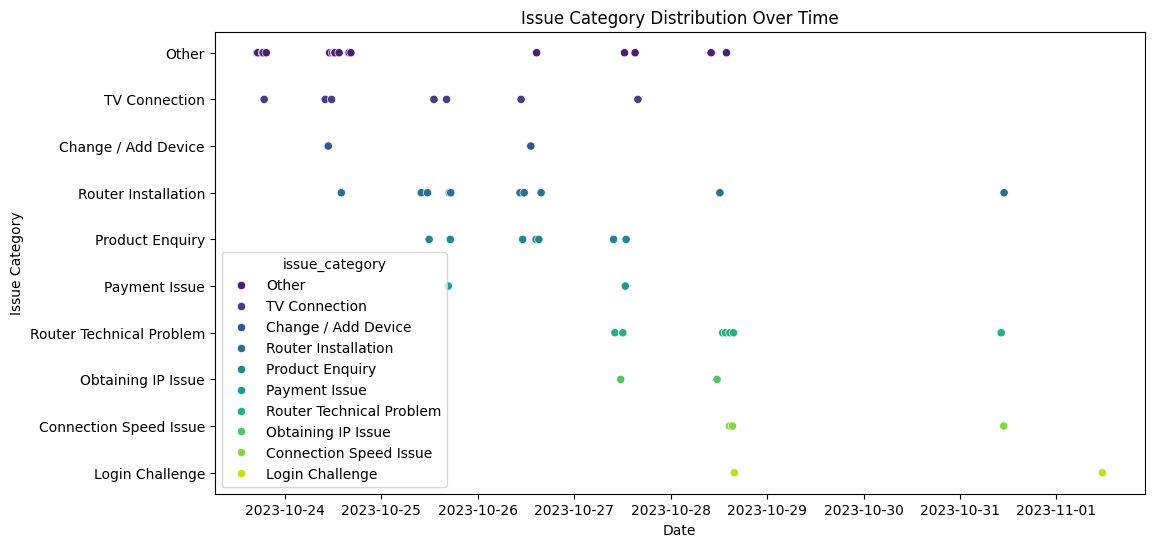

In [21]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to SQLite database
conn = sqlite3.connect('transcriptions.db')

# Fetch data from the database
query = "SELECT date, issue_category FROM transcriptions WHERE issue_category IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='date', y='issue_category', data=df, hue='issue_category', palette='viridis')

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('Issue Category')
plt.title('Issue Category Distribution Over Time')

# Show the plot
plt.show()


#### Plotly

In [22]:
import sqlite3
import pandas as pd
import plotly.express as px

# Connect to SQLite database
conn = sqlite3.connect('transcriptions.db')

# Fetch data from the database
query = "SELECT date, issue_category FROM transcriptions WHERE issue_category IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Create a scatter plot using Plotly
fig = px.scatter(df, x='date', y='issue_category', color='issue_category',
                 title='Issue Category Distribution Over Time',
                 labels={'date': 'Date', 'issue_category': 'Issue Category'})

# Show the plot
fig.show()


/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

